In [5]:
import os
import sys
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from loss_comparison import Comparison
from data_generator import DataGenerator

In [6]:
from sklearn.manifold import TSNE
from myutils import Utils

utils = Utils()

In [7]:
# 真实数据集列表
dataset_list = [os.path.splitext(_)[0] for _ in os.listdir(os.path.join(os.getcwd(), 'datasets'))
                if os.path.splitext(_)[-1] == '.npz']

loss_name_dict = {'Hinge':'hinge_loss', 'Deviation':'deviation_loss', 'Ordinal':'ordinal_loss',
                  'Inverse':'inverse_loss', 'Minus':'minus_loss', 'SDAD':'score_distribution_loss'}

color_dict = {}

for i,k in enumerate(loss_name_dict.keys()):
    
    if k == 'Deviation':
        c = '#e29c45'
    elif k == 'Ordinal':
        c = 'darkgreen'
    else:
        c = "C{}".format(i)
        
    color_dict[k] = c
    
marker_dict = {'Hinge':'P', 'Deviation':'^', 'Ordinal':'v', 'Inverse':'o', 'Minus':'s', 'SDAD':'D'}

In [ ]:
# 直接运行的函数
'''
data可以放任何想测试的数据
dataset是一些现有的数据集名称
synthetic是一些模拟数据
'''
def model_comparison(com, data=None, dataset=None, synthetic=False, synthetic_mode=None, realistic_synthetic_mode=None):
    
    # inverse loss
    result_inverse_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                       resampling=False, loss_name='inverse_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # minus loss
    result_minus_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                     resampling=True, loss_name='minus_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # hinge loss
    result_hinge_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                     resampling=True, loss_name='hinge_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # deviation loss
    result_deviation_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                         resampling=True, loss_name='deviation_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # ordinal loss
    result_ordinal_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                       resampling=False, loss_name='ordinal_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    # score distribution loss
    result_score_loss = com.fit2test(data=data, dataset=dataset, synthetic=synthetic, synthetic_mode=synthetic_mode,
                                     resampling=True, loss_name='score_distribution_loss', realistic_synthetic_mode=realistic_synthetic_mode)

    result_dict = {'inverse_loss': result_inverse_loss,
                   'minus_loss': result_minus_loss,
                   'hinge_loss': result_hinge_loss,
                   'deviation_loss': result_deviation_loss,
                   'ordinal_loss': result_ordinal_loss,
                   'score_distribution_loss': result_score_loss}

    return result_dict

# 每个数据集跑一下结果

In [ ]:
for realistic_synthetic_mode in ['local', 'global', 'cluster', 'dependency']:
    result_dict_list = []
    for dataset in tqdm(dataset_list):
        com = Comparison(epochs=50, la=0.05)
        try:
            result_dict = model_comparison(com, dataset=dataset, realistic_synthetic_mode=realistic_synthetic_mode)
            result_dict_list.append(result_dict)
        except Exception as e:
            print(f'Error: {e}')
            result_dict_list.append({})
            pass

        np.savez_compressed('result_dict_list_' + realistic_synthetic_mode + '.npz', data=result_dict_list)

  0%|                                                                                           | 0/29 [00:00<?, ?it/s]



数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 111, 'Anomalies Ratio(%)': 1.11}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 111, 'Anomalies Ratio(%)': 1.11}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 111, 'Anomalies Ratio(%)': 1.11}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 111, 'Anomalies Ratio(%)': 1.11}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 111, 'Anomalies Ratio(%)': 1.11}
数据集10_cover数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 10, 'Anomalies': 111, 'Anomalies Ratio(%)': 1.11}


  3%|██▊                                                                               | 1/29 [02:05<58:30, 125.39s/it]

{'Samples': 1941, 'Features': 27, 'Anomalies': 673, 'Anomalies Ratio(%)': 34.67}
{'Samples': 1941, 'Features': 27, 'Anomalies': 673, 'Anomalies Ratio(%)': 34.67}
{'Samples': 1941, 'Features': 27, 'Anomalies': 673, 'Anomalies Ratio(%)': 34.67}
{'Samples': 1941, 'Features': 27, 'Anomalies': 673, 'Anomalies Ratio(%)': 34.67}
{'Samples': 1941, 'Features': 27, 'Anomalies': 673, 'Anomalies Ratio(%)': 34.67}
{'Samples': 1941, 'Features': 27, 'Anomalies': 673, 'Anomalies Ratio(%)': 34.67}


  7%|█████▋                                                                             | 2/29 [02:24<42:06, 93.58s/it]

数据集16_http数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 3, 'Anomalies': 54, 'Anomalies Ratio(%)': 0.54}
数据集16_http数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 3, 'Anomalies': 54, 'Anomalies Ratio(%)': 0.54}
数据集16_http数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 3, 'Anomalies': 54, 'Anomalies Ratio(%)': 0.54}
数据集16_http数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 3, 'Anomalies': 54, 'Anomalies Ratio(%)': 0.54}
数据集16_http数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 3, 'Anomalies': 54, 'Anomalies Ratio(%)': 0.54}
数据集16_http数据量过大, 正在抽样...
{'Samples': 10000, 'Features': 3, 'Anomalies': 54, 'Anomalies Ratio(%)': 0.54}


 10%|████████▌                                                                          | 3/29 [03:53<39:51, 91.99s/it]

In [164]:
type_list = ['local', 'global', 'cluster', 'dependency']

result_AUCROC = pd.DataFrame(data=None, index=loss_name_dict.values(), columns=type_list)
result_AUCPR = pd.DataFrame(data=None, index=loss_name_dict.values(), columns=type_list)

for _ in type_list:
    result_dict_list = np.load('result_dict_list_' + _ + '.npz', allow_pickle=True)
    result_dict_list = result_dict_list['data']

    
    for i, k in enumerate(result_dict_list[0].keys()):
        aucroc_ave, aucpr_ave = [], []
        for j in range(len(result_dict_list)):
            if len(result_dict_list[j]) > 0:
                aucroc_ave.append(result_dict_list[j][k]['performance']['aucroc'])
                aucpr_ave.append(result_dict_list[j][k]['performance']['aucpr'])
            else:
                continue
            
        result_AUCROC.loc[k, _] = np.mean(aucroc_ave)
        result_AUCPR.loc[k, _] = np.mean(aucpr_ave)
        
# result_AUCROC.astype('float').round(3).to_csv('result_type_AUCROC.csv', index=True)
# result_AUCPR.astype('float').round(3).to_csv('result_type_AUCPR.csv', index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'result_dict_list_local.npz'

# loss变化

In [ ]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(21,3))
for i, result_dict in enumerate(result_dict_list[:4]):
    fig.add_subplot(1, 4, i+1)
    for k,v in loss_name_dict.items():
#         if k not in ['Inverse', 'Minus']:
            loss = np.array(result_dict[v]['loss'])[:50]
            loss = np.sign(loss) * np.log(np.abs(loss))

            plt.plot(loss, label=k, linewidth=2)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(dataset_list[:4][i], fontsize=16)
    
    if i == 0:
        plt.legend(bbox_to_anchor=(3.95, -0.35), ncol=len(loss_name_dict))
        
    plt.subplots_adjust(wspace=0.4)
    
# plt.savefig('loss_comparison.png', dpi=600, bbox_inches="tight")

In [ ]:
sns.set_style("white")

fig = plt.figure(figsize=(16,8))

for k,v in loss_name_dict.items():
    if k not in ['Inverse', 'Minus']:
        loss = np.array(result_dict[v]['loss'])[:20]
        loss = np.sign(loss) * np.log(np.abs(loss))

        plt.plot(loss, label=k, linewidth=2)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
#     plt.title(dataset_list[:4][i], fontsize=16)

#     plt.legend(bbox_to_anchor=(3.95, -0.35), ncol=len(loss_name_dict))
        
#     plt.subplots_adjust(wspace=0.4)
    
# plt.savefig('loss_comparison.png', dpi=600, bbox_inches="tight")

In [ ]:
sns.set_style("white")


fig, ax1 = plt.subplots(figsize=(16,4))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.1, 0.1, 0.1, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(loss, color='red')
ax1.grid()
ax2.scatter(X[y==0,0],X[y==0,1],color = 'blue',label = 'anomaly', edgecolors='k')
ax2.scatter(X[y==1,0],X[y==1,1],color = 'red',label = 'anomaly', edgecolors='k')
# ax2.set_xticks('')

plt.show()

# 参数变化

In [16]:
loss_name_list = ['inverse_loss', 'minus_loss', 'hinge_loss', 'deviation_loss', 'ordinal_loss', 'score_distribution_loss']

result_dict_list = np.load('result_dict_list.npz', allow_pickle=True)
result_dict_list = result_dict_list['data']

In [17]:
# 计算模型参数变动
def param_diff(model_init, model):
    model_init_params = model_init.state_dict()
    model_params = model.state_dict()
    
    diff = 0.0

    for i, k in enumerate(model_params.keys()):
        if i < 4:
            diff += torch.norm(model_params[k].float() - model_init_params[k].float())

    return diff.numpy()[()]

# 真实数据
df_param_diff = pd.DataFrame(data=None, index=dataset_list, columns=loss_name_dict.values())

for i, dataset in tqdm(enumerate(dataset_list)):
    for k,v in result_dict_list[i].items():
        df_param_diff.loc[dataset, k] = param_diff(model_init=v['model_init'], model=v['model'])


0it [00:00, ?it/s]
8it [00:00, 617.04it/s]

In [18]:
df_param_diff = df_param_diff.dropna()
df_param_diff

,hinge_loss,deviation_loss,ordinal_loss,inverse_loss,minus_loss,score_distribution_loss
10_cover,13.071362,9.796988,9.556596,5.421041,4.032382,2.754756
12_fault,16.234993,8.431836,10.149773,4.581409,3.32577,1.328923
16_http,11.614826,10.268167,10.724066,5.093314,5.058541,3.167217
17_InternetAds,15.014891,9.622597,10.515058,6.754426,3.537104,0.881637
19_landsat,12.550041,10.53765,11.096824,8.30954,3.762286,3.100606
1_ALOI,20.488358,7.991966,8.039018,3.80826,3.924401,3.350103
20_letter,20.109848,10.381294,10.838415,4.385693,3.497238,1.638572
22_magic.gamma,19.256653,8.891545,8.74507,5.75329,3.791058,2.46704


In [19]:
df_param_diff_log = df_param_diff.copy()
df_param_diff_log = df_param_diff_log[['hinge_loss', 'deviation_loss', 'ordinal_loss', 'inverse_loss', 'minus_loss', 'score_distribution_loss']]
for i in range(df_param_diff_log.shape[1]):
    df_param_diff_log.iloc[:, i] = df_param_diff_log.iloc[:, i].astype(float)
    df_param_diff_log.iloc[:, i] = np.log(df_param_diff_log.iloc[:, i].values)
    
df_param_diff_log.columns = loss_name_dict.keys()

Text(0, 0.5, 'Parameter Changes (log)')

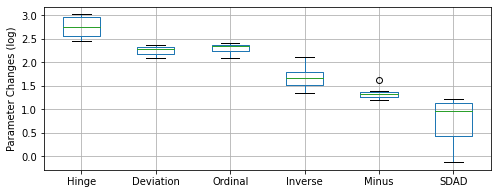

In [20]:
df_param_diff_log.boxplot(figsize=(8,3))
plt.ylabel('Parameter Changes (log)')
# plt.savefig('loss_comparison.png', dpi=600, bbox_inches="tight")

# Feature Embedding

In [ ]:
# for n, result_dict in enumerate(result_dict_list):
#     fig = plt.figure(figsize=(24,3))
    
#     for i, (k,v) in enumerate(loss_name_dict.items()):
#         if i == 0:
#             fig.add_subplot(1, 7, 1)
#             X = TSNE(n_components=2, random_state=42).fit_transform(result_dict[v]['data']['X_test'])
#             y = result_dict[v]['data']['y_test']

#             plt.scatter(X[y==0, 0], X[y==0, 1], c='b', edgecolor='k', alpha=0.8)
#             plt.scatter(X[y==1, 0], X[y==1, 1], c='r', edgecolor='k', alpha=0.8)
#             plt.title(f'Input Feature')
            
#         fig.add_subplot(1, 7, i+2)
#         X = TSNE(n_components=2, random_state=42).fit_transform(result_dict[v]['feature'])

#         plt.scatter(X[y==0, 0], X[y==0, 1], c='b', edgecolor='k', alpha=0.8)
#         plt.scatter(X[y==1, 0], X[y==1, 1], c='r', edgecolor='k', alpha=0.8)
# #         plt.xlim(-20, 20)
# #         plt.ylim(-20, 20)
#         plt.title(k)
        
# #     plt.suptitle(dataset_list[n], fontsize=20, y=1.1)
#     plt.subplots_adjust(wspace=0.3)
#     plt.savefig('embeddin_' + dataset_list[n] + '.png', dpi=150, bbox_inches="tight")
    
#     plt.show()

In [20]:
com = Comparison(epochs=200, la=0.05)
result_dict = model_comparison(com, dataset='40_vowels')

{'Samples': 1456, 'Features': 12, 'Anomalies': 50, 'Anomalies Ratio(%)': 3.43}


D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

{'Samples': 1456, 'Features': 12, 'Anomalies': 50, 'Anomalies Ratio(%)': 3.43}


D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

{'Samples': 1456, 'Features': 12, 'Anomalies': 50, 'Anomalies Ratio(%)': 3.43}


D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

{'Samples': 1456, 'Features': 12, 'Anomalies': 50, 'Anomalies Ratio(%)': 3.43}


D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

{'Samples': 1456, 'Features': 12, 'Anomalies': 50, 'Anomalies Ratio(%)': 3.43}


D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

{'Samples': 1456, 'Features': 12, 'Anomalies': 50, 'Anomalies Ratio(%)': 3.43}


D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

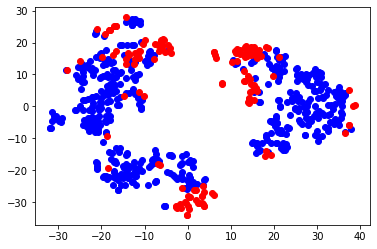

In [21]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(v['data']['X_test'])
y_tsne = v['data']['y_test']

plt.scatter(X_tsne[y_tsne==0, 0], X_tsne[y_tsne==0, 1], color='blue')
plt.scatter(X_tsne[y_tsne==1, 0], X_tsne[y_tsne==1, 1], color='red')
plt.show()

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

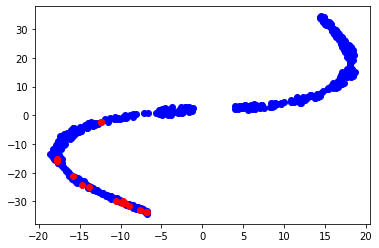

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

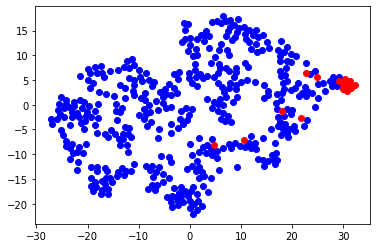

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

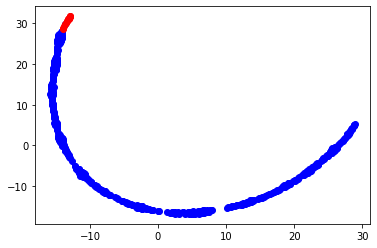

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

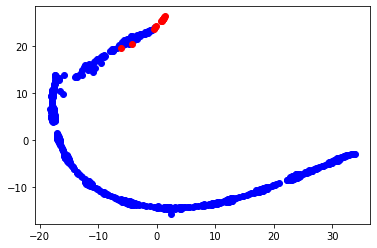

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

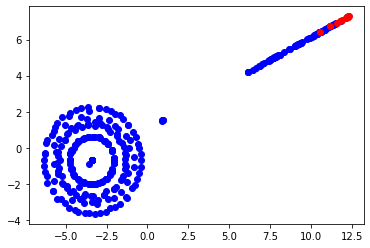

D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
D:\Anaconda37\lib\site-packages\sklearn\manifold\t_sne.

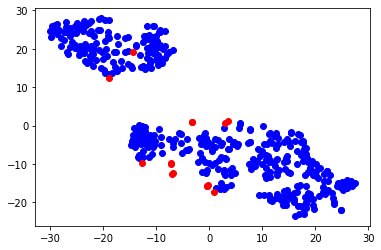

In [22]:
for k, v in result_dict.items():
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(v['feature'])
    y_tsne = v['data']['y_test']
    
    plt.scatter(X_tsne[y_tsne==0, 0], X_tsne[y_tsne==0, 1], color='blue')
    plt.scatter(X_tsne[y_tsne==1, 0], X_tsne[y_tsne==1, 1], color='red')
    plt.show()

In [24]:
torch.zero

tensor([0, 2, 3])

# score distribution

In [ ]:
for result_dict in result_dict_list:
    fig = plt.figure(figsize=(21,3))
    # score distribution
    for i, (k,v) in enumerate(loss_name_dict.items()):
        fig.add_subplot(1, 6, i+1)
        score = result_dict[v]['score']
        y = result_dict[v]['data']['y_test']
        sns.distplot(score[y==0])
        sns.distplot(score[y==1])
        plt.title(k)

    plt.subplots_adjust(wspace=0.2)
    plt.show()

# 模拟数据上的性能

In [73]:
# com = Comparison(epochs=50, lr=1e-2, anomaly_ratio=0.05, n_pts=1000, seed=4)
com = Comparison(epochs=50, lr=1e-2, anomaly_ratio=0.05, n_pts=1000, la=1.00, seed=4)

local outlier

In [74]:
result_dict = model_comparison(com, data=None, dataset=None, synthetic=True, synthetic_mode='GM')

df_performance = pd.DataFrame(data=None, index=result_dict.keys(), columns=['AUC-ROC', 'AUC-PR'])
for i in range(df_performance.shape[0]):
    loss_name = df_performance.index[i]
    
    df_performance.loc[loss_name, 'AUC-ROC'] = result_dict[loss_name]['performance']['aucroc']
    df_performance.loc[loss_name, 'AUC-PR'] = result_dict[loss_name]['performance']['aucpr']
    
for i in range(df_performance.shape[0]):
    for j in range(df_performance.shape[1]):
        df_performance.iloc[i, j] = format(round(df_performance.iloc[i, j], 3), '.3f')
        
# df_performance.to_csv('case_local.csv')

D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

In [75]:
df_performance

,AUC-ROC,AUC-PR
inverse_loss,0.517,0.123
minus_loss,0.447,0.143
hinge_loss,0.805,0.263
deviation_loss,0.698,0.188
ordinal_loss,0.724,0.210
score_distribution_loss,0.960,0.725


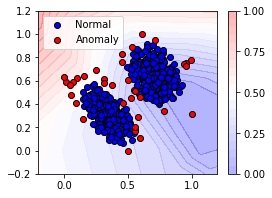

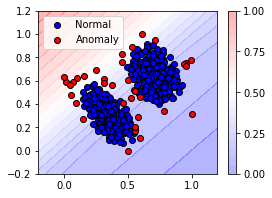

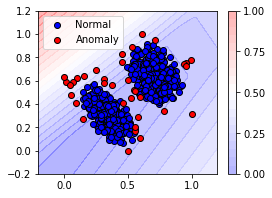

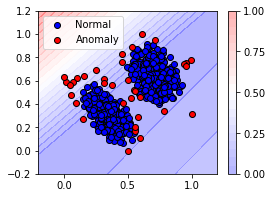

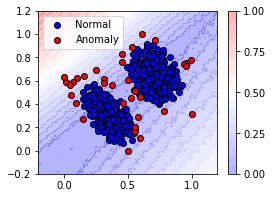

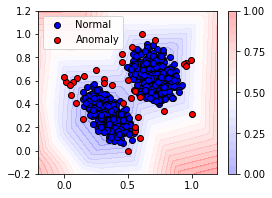

In [76]:
X = result_dict['score_distribution_loss']['data']['X_train']
y = result_dict['score_distribution_loss']['data']['y_train']

#visualize the decision boundary
xlim_l = np.min(X[:, 0]) - 0.2
xlim_u = np.max(X[:, 0]) + 0.2

ylim_l = np.min(X[:, 1]) - 0.2
ylim_u = np.max(X[:, 1]) + 0.2


xx, yy = np.meshgrid(np.linspace(xlim_l, xlim_u, 100),np.linspace(ylim_l, ylim_u, 100))
xxyy = np.c_[xx.ravel(), yy.ravel()]

# only for implemenetation, not real
l = np.random.choice([0,1], xxyy.shape[0])

result_dict = model_comparison(com, data={'X_train':X, 'X_test':xxyy, 'y_train':y, 'y_test':l})

for i, (k,v) in enumerate(result_dict.items()):
    score = v['score']
    score = (score - np.min(score)) / (np.max(score) - np.min(score))
    
    fig = plt.figure(figsize=(4, 3))
    #决策边界
    ct = plt.contourf(xx, yy, score.reshape(xx.shape), 20, cmap='bwr', alpha=0.3)
    cbar = fig.colorbar(ct, orientation="vertical")
    cbar.set_ticks(np.linspace(0, 1, 5))

    plt.scatter(X[y==0,0],X[y==0,1],color = 'blue', label = 'Normal', edgecolors='k')
    plt.scatter(X[y==1,0],X[y==1,1],color = 'red', label = 'Anomaly', edgecolors='k')
    plt.legend()
    
#     plt.savefig('result/vis/'+'local_'+k+'.pdf', dpi=300, bbox_inches='tight', pad_inches=0.01)

clustered outlier

In [77]:
result_dict = model_comparison(com, data=None, dataset=None, synthetic=True, synthetic_mode='Cluster')

df_performance = pd.DataFrame(data=None, index=result_dict.keys(), columns=['AUC-ROC', 'AUC-PR'])
for i in range(df_performance.shape[0]):
    loss_name = df_performance.index[i]
    
    df_performance.loc[loss_name, 'AUC-ROC'] = result_dict[loss_name]['performance']['aucroc']
    df_performance.loc[loss_name, 'AUC-PR'] = result_dict[loss_name]['performance']['aucpr']
    
for i in range(df_performance.shape[0]):
    for j in range(df_performance.shape[1]):
        df_performance.iloc[i, j] = format(round(df_performance.iloc[i, j], 3), '.3f')
        
# df_performance.to_csv('case_cluster.csv')

D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
D:\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

In [78]:
df_performance

,AUC-ROC,AUC-PR
inverse_loss,1.000,1.000
minus_loss,1.000,1.000
hinge_loss,1.000,1.000
deviation_loss,1.000,1.000
ordinal_loss,1.000,1.000
score_distribution_loss,1.000,1.000


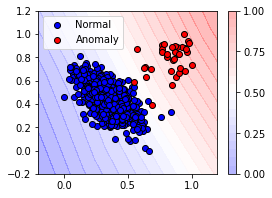

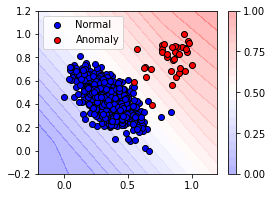

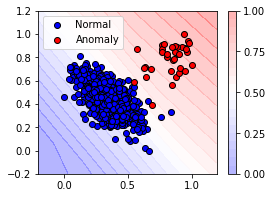

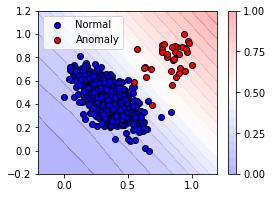

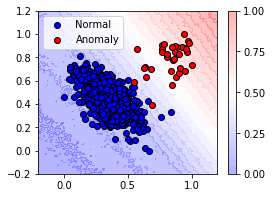

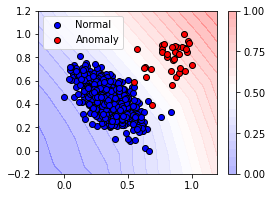

In [79]:
X = result_dict['score_distribution_loss']['data']['X_train']
y = result_dict['score_distribution_loss']['data']['y_train']

#visualize the decision boundary
xlim_l = np.min(X[:, 0]) - 0.2
xlim_u = np.max(X[:, 0]) + 0.2

ylim_l = np.min(X[:, 1]) - 0.2
ylim_u = np.max(X[:, 1]) + 0.2


xx, yy = np.meshgrid(np.linspace(xlim_l, xlim_u, 100),np.linspace(ylim_l, ylim_u, 100))
xxyy = np.c_[xx.ravel(), yy.ravel()]

# only for implemenetation, not real
l = np.random.choice([0,1], xxyy.shape[0])

result_dict = model_comparison(com, data={'X_train':X, 'X_test':xxyy, 'y_train':y, 'y_test':l})

for i, (k,v) in enumerate(result_dict.items()):
    score = v['score']
    score = (score - np.min(score)) / (np.max(score) - np.min(score))
    
    fig = plt.figure(figsize=(4, 3))
    #决策边界
    ct = plt.contourf(xx, yy, score.reshape(xx.shape), 20, cmap='bwr', alpha=0.3)
    cbar = fig.colorbar(ct, orientation="vertical")
    cbar.set_ticks(np.linspace(0, 1, 5))

    plt.scatter(X[y==0,0],X[y==0,1],color = 'blue', label = 'Normal', edgecolors='k')
    plt.scatter(X[y==1,0],X[y==1,1],color = 'red', label = 'Anomaly', edgecolors='k')
    plt.legend()
    
#     plt.savefig('result/vis/'+'cluster_'+k+'.pdf', dpi=300, bbox_inches='tight', pad_inches=0.01)

和ADBench一致,产生cluster以及dependency anomalies

In [164]:
com = Comparison(epochs=50, lr=1e-2, anomaly_ratio=0.05, n_pts=1000, la=1.00, seed=42)
X, y = com.data_generator_synthetic('Cluster')

data_generator = DataGenerator()
X, y = data_generator.generate_realistic_synthetic(X, y, 'local', alpha=5, percentage=0.1)
com.la = 1.0
data = com.data_preprocess(X, y)

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

D:\Anaconda37\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/releas

D:\Anaconda37\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/releas

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\Anaconda37\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `n

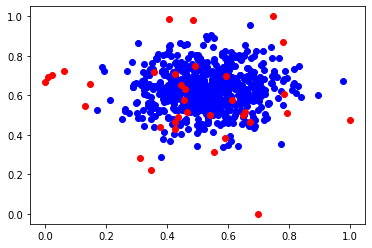

In [165]:
X = data['X_train']
y = data['y_train']

plt.scatter(X[y==0, 0], X[y==0, 1], color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red')

In [166]:
# com = Comparison(epochs=50, lr=1e-2, anomaly_ratio=0.05, n_pts=1000, la=0.00)
result_dict = model_comparison(com, data=data, dataset=None)

df_performance = pd.DataFrame(data=None, index=result_dict.keys(), columns=['AUC-ROC', 'AUC-PR'])
for i in range(df_performance.shape[0]):
    loss_name = df_performance.index[i]
    
    df_performance.loc[loss_name, 'AUC-ROC'] = result_dict[loss_name]['performance']['aucroc']
    df_performance.loc[loss_name, 'AUC-PR'] = result_dict[loss_name]['performance']['aucpr']
    
for i in range(df_performance.shape[0]):
    for j in range(df_performance.shape[1]):
        df_performance.iloc[i, j] = format(round(df_performance.iloc[i, j], 3), '.3f')
        
# df_performance.to_csv('case_cluster.csv')
df_performance

,AUC-ROC,AUC-PR
inverse_loss,0.433,0.205
minus_loss,0.443,0.222
hinge_loss,0.443,0.222
deviation_loss,0.504,0.238
ordinal_loss,0.629,0.305
score_distribution_loss,0.643,0.209


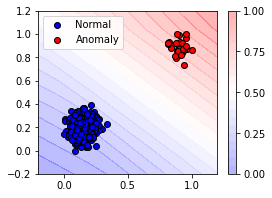

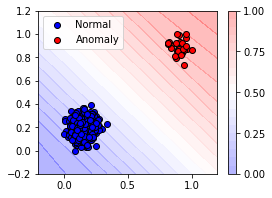

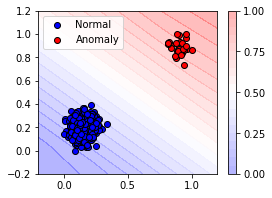

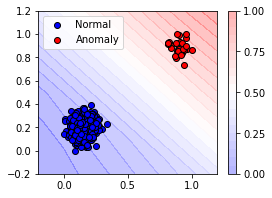

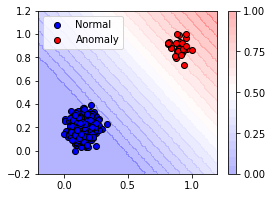

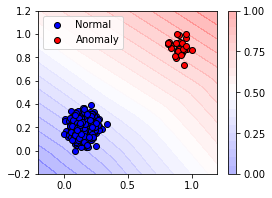

In [148]:
X = result_dict['score_distribution_loss']['data']['X_train']
y = result_dict['score_distribution_loss']['data']['y_train']

#visualize the decision boundary
xlim_l = np.min(X[:, 0]) - 0.2
xlim_u = np.max(X[:, 0]) + 0.2

ylim_l = np.min(X[:, 1]) - 0.2
ylim_u = np.max(X[:, 1]) + 0.2


xx, yy = np.meshgrid(np.linspace(xlim_l, xlim_u, 100),np.linspace(ylim_l, ylim_u, 100))
xxyy = np.c_[xx.ravel(), yy.ravel()]

# only for implemenetation, not real
l = np.random.choice([0,1], xxyy.shape[0])

result_dict = model_comparison(com, data={'X_train':X, 'X_test':xxyy, 'y_train':y, 'y_test':l})

for i, (k,v) in enumerate(result_dict.items()):
    score = v['score']
    score = (score - np.min(score)) / (np.max(score) - np.min(score))
    
    fig = plt.figure(figsize=(4, 3))
    #决策边界
    ct = plt.contourf(xx, yy, score.reshape(xx.shape), 20, cmap='bwr', alpha=0.3)
    cbar = fig.colorbar(ct, orientation="vertical")
    cbar.set_ticks(np.linspace(0, 1, 5))

    plt.scatter(X[y==0,0],X[y==0,1],color = 'blue', label = 'Normal', edgecolors='k')
    plt.scatter(X[y==1,0],X[y==1,1],color = 'red', label = 'Anomaly', edgecolors='k')
    plt.legend()
    
    plt.savefig('result/vis/'+'cluster_'+k+'.pdf', dpi=300, bbox_inches='tight', pad_inches=0.01)